# Partial Least Squares(부분 최소 제곱법)

### tSNE와 비슷한 차원 축소 방법으로 PCA와 다르게 비선형 데이터 축소  에 강하고 변수의 개수 n과 feature의 개수 p가 서로 비슷하거나 p가 n보다 클 경우 자주 사용된다. 

In [35]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.cross_decomposition import PLSRegression
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import pandas as pd

### 데이터 로드

#### 100개의 sample, 500개의 feature, 0과1 분류

In [36]:
X,y = make_classification(n_samples=100,n_features=500,n_informative=100,n_classes=2,random_state=2021)

In [37]:
print('X shape : {}, y shape : {}'.format(X.shape,y.shape))
pd.concat([pd.DataFrame(X),pd.DataFrame(y)],axis=1).head()

X shape : (100, 500), y shape : (100,)


,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,0
0,2.259847,-1.148370,-1.333091,-0.386961,-0.334060,1.933279,-1.289015,0.300465,-0.298549,1.597214,...,-0.366628,-3.577080,-0.680837,-1.940354,-1.038677,-0.303218,0.039709,-2.081429,0.141831,0
1,-3.665193,-1.003865,0.438098,-0.962139,0.738235,0.594833,-1.108695,0.039046,0.458278,-1.193748,...,-0.026171,9.518929,1.051629,-0.529314,0.047275,0.616865,0.404355,0.112155,1.236201,0
2,-3.863759,-1.560758,1.338754,0.879793,0.132548,-2.518793,2.303266,-0.998326,-0.545050,-0.233389,...,0.524647,3.413562,0.274757,-0.232519,2.173486,-0.923913,0.591501,0.503077,-1.027534,1
3,4.027934,-0.044884,-2.314829,-0.190687,0.264366,-1.003643,-0.122520,-0.846276,1.050383,-0.154980,...,0.703703,-4.505847,0.621373,-0.825565,-1.343799,0.354939,-0.497685,-1.666821,0.393929,0
4,5.847286,-0.519466,-1.179290,-0.045100,0.478195,0.573718,-1.228377,-1.820421,-0.824483,1.039919,...,1.115125,3.580695,0.645580,0.817670,0.318869,-1.025267,0.241732,-0.617144,-0.949305,0


### 같은 데이터에서 추출된 특징의 차이 확인

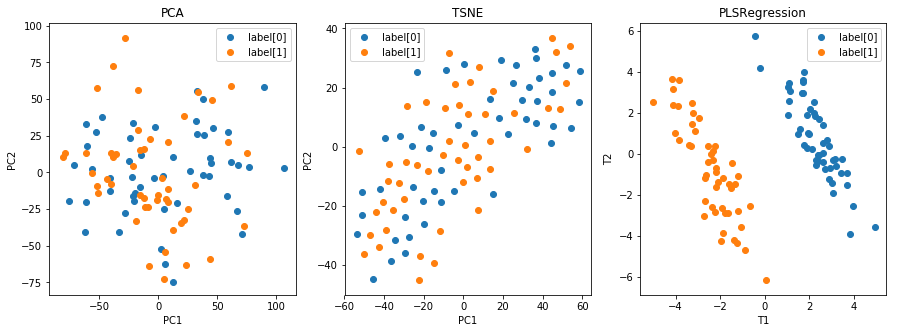

In [38]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

points = PCA(n_components=2,random_state=2021).fit_transform(X)
ax[0].scatter(points[y==0,0],points[y==0,1],label = 'label[0]')
ax[0].scatter(points[y==1,0], points[y==1,1], label="label[1]")
ax[0].set_title("PCA")
ax[0].set_xlabel("PC1")
ax[0].set_ylabel("PC2")
ax[0].legend()

# TSNE
points = TSNE(n_components=2, random_state=2021).fit_transform(X)
ax[1].scatter(points[y==0,0], points[y==0,1], label="label[0]")
ax[1].scatter(points[y==1,0], points[y==1,1], label="label[1]")
ax[1].set_title("TSNE")
ax[1].set_xlabel("PC1")
ax[1].set_ylabel("PC2")
ax[1].legend()

# PLS
points, _ = PLSRegression(n_components=2).fit_transform(X,y) #Components 개수, 학습과 차원 축소 동시에 진행
ax[2].scatter(points[y==0,0], points[y==0,1], label="label[0]")
ax[2].scatter(points[y==1,0], points[y==1,1], label="label[1]")
ax[2].set_title("PLSRegression")
ax[2].set_xlabel("T1")
ax[2].set_ylabel("T2")
ax[2].legend()

plt.show()
plt.close()

    PCA : 선형 방식으로 정사영하기 때문에 차원이 줄어들면서 뭉개지는 특징을 가진다.
    TSNE : 기존 데이터 형태의 분포를 이해할 수 있는 형태로 축소해주는 특징을 가진다.
    PSL : t1의 특징을 제외한 데이터에서 t2를 찾기 때문에 전혀 겹치지 않는 특징을 가진다.